In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("student_performance.csv")

In [6]:
df

,Roll No,Name,F.E,S.E,T.E,B.E
0,1,yashraj,12,8,10.0,9.0
1,2,abhijit,9,9,9.0,8.0
2,3,ashish,7,7,8.0,NaN
3,6,akash,7,5,9.0,9.0
4,9,darshan,6,7,NaN,7.0
5,10,chetan,8,8,NaN,8.0
6,12,amruta,7,8,9.0,NaN
7,13,shivani,9,7,7.0,8.0
8,14,gunjan,7,8,NaN,NaN
9,15,komal,8,9,8.0,8.0


In [7]:
# 1.show missing values
df.isnull()

,Roll No,Name,F.E,S.E,T.E,B.E
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,False,False,False,False,False
8,False,False,False,False,True,True
9,False,False,False,False,False,False


2 . replace missing values

In [9]:
# 1 . using mean 
mean_df = df.fillna(df.mean(numeric_only = True))

In [10]:
mean_df

,Roll No,Name,F.E,S.E,T.E,B.E
0,1,yashraj,12,8,10.000000,9.000000
1,2,abhijit,9,9,9.000000,8.000000
2,3,ashish,7,7,8.000000,8.142857
3,6,akash,7,5,9.000000,9.000000
4,9,darshan,6,7,8.571429,7.000000
5,10,chetan,8,8,8.571429,8.000000
6,12,amruta,7,8,9.000000,8.142857
7,13,shivani,9,7,7.000000,8.000000
8,14,gunjan,7,8,8.571429,8.142857
9,15,komal,8,9,8.000000,8.000000


In [12]:
# 2 using median
median_df = df.fillna(df.median(numeric_only = True))

In [13]:
median_df

,Roll No,Name,F.E,S.E,T.E,B.E
0,1,yashraj,12,8,10.0,9.0
1,2,abhijit,9,9,9.0,8.0
2,3,ashish,7,7,8.0,8.0
3,6,akash,7,5,9.0,9.0
4,9,darshan,6,7,9.0,7.0
5,10,chetan,8,8,9.0,8.0
6,12,amruta,7,8,9.0,8.0
7,13,shivani,9,7,7.0,8.0
8,14,gunjan,7,8,9.0,8.0
9,15,komal,8,9,8.0,8.0


In [14]:
filllNum = df.fillna(-1) 

In [15]:
filllNum

,Roll No,Name,F.E,S.E,T.E,B.E
0,1,yashraj,12,8,10.0,9.0
1,2,abhijit,9,9,9.0,8.0
2,3,ashish,7,7,8.0,-1.0
3,6,akash,7,5,9.0,9.0
4,9,darshan,6,7,-1.0,7.0
5,10,chetan,8,8,-1.0,8.0
6,12,amruta,7,8,9.0,-1.0
7,13,shivani,9,7,7.0,8.0
8,14,gunjan,7,8,-1.0,-1.0
9,15,komal,8,9,8.0,8.0


In [16]:
# Boxplot 

In [17]:
import seaborn as sns

<Axes: >

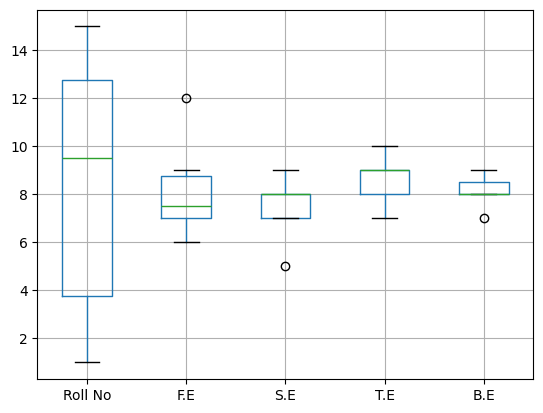

In [18]:
df.boxplot()

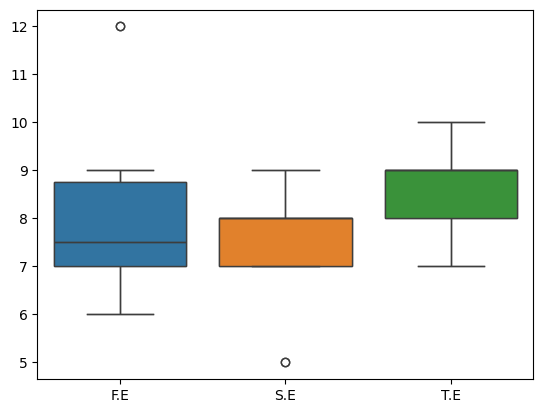

In [22]:
sns.boxplot(data = df[['F.E' , 'S.E', 'T.E']])
plt.show()

In [26]:
# Scatter plot
sns.scatterplot(data=df, x='F.E', y='S.E')

<Axes: xlabel='F.E', ylabel='S.E'>

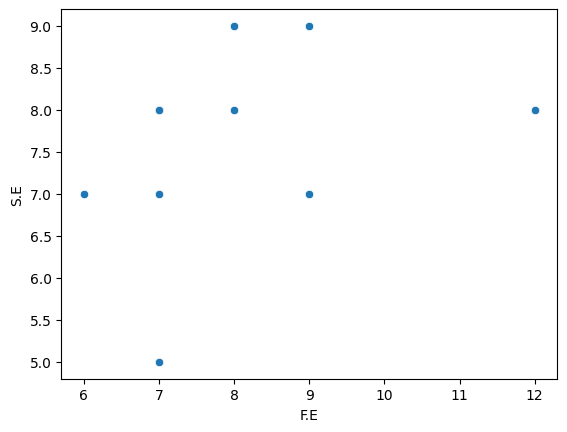

In [27]:
plt.show()

# 3.Identify the outliers

In [32]:
# 1 . IQR
import numpy as np
q1 = df['F.E'].quantile(0.25)
q3 = df['F.E'].quantile(0.75)


# calculate iqr 
IQR = q3 - q1

lower = q1 - 1.5 * IQR
higher = q3 + 1.5 * IQR

In [34]:
# find outliers
outliers = df[(lower > df['F.E']) | (higher < df['F.E'])]
outliers

,Roll No,Name,F.E,S.E,T.E,B.E
0,1,yashraj,12,8,10.0,9.0


In [37]:
# Remove outliers
removed_outliers = df[(lower <= df['F.E']) & (higher >= df['F.E'])]
removed_outliers

,Roll No,Name,F.E,S.E,T.E,B.E
1,2,abhijit,9,9,9.0,8.0
2,3,ashish,7,7,8.0,NaN
3,6,akash,7,5,9.0,9.0
4,9,darshan,6,7,NaN,7.0
5,10,chetan,8,8,NaN,8.0
6,12,amruta,7,8,9.0,NaN
7,13,shivani,9,7,7.0,8.0
8,14,gunjan,7,8,NaN,NaN
9,15,komal,8,9,8.0,8.0


In [40]:
# Z Score

df['Z-score'] = (df['F.E'] - df['F.E'].mean()) / df['F.E'].std()
df['Z-score'] 

0    2.353394
1    0.588348
2   -0.588348
3   -0.588348
4   -1.176697
5    0.000000
6   -0.588348
7    0.588348
8   -0.588348
9    0.000000
Name: Z-score, dtype: float64

In [43]:
# find outliers
outliers = df[(df['Z-score'] < -2) | (df['Z-score'] > 2)]
outliers

,Roll No,Name,F.E,S.E,T.E,B.E,Z-score
0,1,yashraj,12,8,10.0,9.0,2.353394


In [45]:
removed_outliers = df[(df['Z-score'] >= -2) & (df['Z-score'] <= 2)]
removed_outliers

,Roll No,Name,F.E,S.E,T.E,B.E,Z-score
1,2,abhijit,9,9,9.0,8.0,0.588348
2,3,ashish,7,7,8.0,NaN,-0.588348
3,6,akash,7,5,9.0,9.0,-0.588348
4,9,darshan,6,7,NaN,7.0,-1.176697
5,10,chetan,8,8,NaN,8.0,0.000000
6,12,amruta,7,8,9.0,NaN,-0.588348
7,13,shivani,9,7,7.0,8.0,0.588348
8,14,gunjan,7,8,NaN,NaN,-0.588348
9,15,komal,8,9,8.0,8.0,0.000000


# Data Normalization

In [46]:
mini = df['F.E'].min()
maxi = df['F.E'].max();
diff = maxi - mini

In [49]:
df['F.E'] = ( df['F.E'] - df['F.E'].min() ) / (df['F.E'].max() - df['F.E'].min())
df['T.E'] = ( df['T.E'] - df['T.E'].min() ) / (df['T.E'].max() - df['T.E'].min())
print(df)

   Roll No     Name       F.E  S.E       T.E  B.E   Z-score
0        1  yashraj  1.000000    8  1.000000  9.0  2.353394
1        2  abhijit  0.500000    9  0.666667  8.0  0.588348
2        3   ashish  0.166667    7  0.333333  NaN -0.588348
3        6    akash  0.166667    5  0.666667  9.0 -0.588348
4        9  darshan  0.000000    7       NaN  7.0 -1.176697
5       10   chetan  0.333333    8       NaN  8.0  0.000000
6       12   amruta  0.166667    8  0.666667  NaN -0.588348
7       13  shivani  0.500000    7  0.000000  8.0  0.588348
8       14   gunjan  0.166667    8       NaN  NaN -0.588348
9       15    komal  0.333333    9  0.333333  8.0  0.000000


# Decimal scaling

In [50]:
max_value = df['S.E'].max()

In [51]:
len_max = len(str(max_value))

In [52]:
df['S.E'] = df['S.E'] / (10 ** len_max)

In [53]:
df

,Roll No,Name,F.E,S.E,T.E,B.E,Z-score
0,1,yashraj,1.000000,0.8,1.000000,9.0,2.353394
1,2,abhijit,0.500000,0.9,0.666667,8.0,0.588348
2,3,ashish,0.166667,0.7,0.333333,NaN,-0.588348
3,6,akash,0.166667,0.5,0.666667,9.0,-0.588348
4,9,darshan,0.000000,0.7,NaN,7.0,-1.176697
5,10,chetan,0.333333,0.8,NaN,8.0,0.000000
6,12,amruta,0.166667,0.8,0.666667,NaN,-0.588348
7,13,shivani,0.500000,0.7,0.000000,8.0,0.588348
8,14,gunjan,0.166667,0.8,NaN,NaN,-0.588348
9,15,komal,0.333333,0.9,0.333333,8.0,0.000000
